In [2]:
import pandas as pd
import numpy as np
import os
import scipy
import itertools
#os.environ['XGBOOST_BUILD_DOC'] = 'C:\\Users\\sushant\\Anaconda2\\lib\\site-packages\\xgboost;'
import matplotlib.pyplot as plt    
import xgboost
iv=['np'	, 'os'	 ,'pd'	, 'plt'	 ,'tqdm'	, 'train'	 ,'train_date'	, 'train_date_num'	, 'train_num'	 ]
def memchk(iv):
    import sys,operator
    ipython_vars=iv
    ,'warnings'	, 'xgboost']
    print sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
    return sorted([{i:sys.getsizeof(globals().get(i))/1000000.0} for i in ipython_vars])
%matplotlib inline
from IPython.display import Markdown, display
from sklearn.metrics import confusion_matrix
import warnings
%load_ext autotime
def printmd(string):
    display(Markdown(string))

warnings.filterwarnings('ignore')
from tqdm import tqdm

C:\Users\sushant\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


time: 21 ms


### Load sample numeric and date 
#### First 10000

In [43]:
train_num = pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Samples\\sample_num_bal8.csv',dtype=np.float32).head(10000).set_index('Unnamed: 0')
#train_cat = pd.read_csv('sample_cat.csv').head().set_index('Unnamed: 0')
train_date = pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Samples\\sample_date_bal8.csv',dtype=np.float32).head(10000).set_index('Unnamed: 0')

time: 2.76 s


In [44]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9030 entries, 168.0 to 83406.0
Columns: 970 entries, Id to Response
dtypes: float32(970)
memory usage: 33.5 MB
time: 88 ms


In [45]:
train_num.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
168.0,342.0,0.160,0.131,-0.052,-0.016,-0.100,-0.248,-0.030,-0.112,-0.016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
510.0,995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
706.0,1406.0,-0.167,-0.198,-0.161,-0.179,0.074,-0.021,0.022,0.128,-0.067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
724.0,1447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
780.0,1595.0,0.023,-0.004,-0.215,-0.216,0.074,-0.112,-0.015,-0.072,-0.092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


time: 40 ms


In [46]:
train_date.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9030 entries, 168.0 to 3406.0
Columns: 1157 entries, Id to L3_S51_D4263
dtypes: float32(1157)
memory usage: 39.9 MB
time: 72 ms


In [47]:


#[train_num.describe().loc['min']+2<0]

time: 1e+03 µs


In [48]:
train_num.describe()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
count,9030.000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,...,211.0,211.0,211.000000,211.000000,211.000000,430.000000,430.0,430.000000,430.000000,9030.000000
mean,1189182.875,-0.000523,0.000468,-0.011189,-0.011095,0.000988,0.001876,-0.000388,-0.003406,-0.002284,...,0.0,0.0,0.005972,0.000038,0.003555,-0.000014,0.0,0.000007,0.000014,0.336656
std,677447.375,0.078201,0.091128,0.205947,0.206105,0.094425,0.163174,0.018572,0.100374,0.114073,...,0.0,0.0,0.068110,0.000435,0.250569,0.000117,0.0,0.000145,0.000204,0.472592
min,342.000,-0.284000,-0.347000,-0.397000,-0.397000,-0.404000,-0.566000,-0.044000,-0.232000,-0.357000,...,0.0,0.0,0.000000,0.000000,-0.250000,-0.001000,0.0,0.000000,0.000000,0.000000
25%,609654.000,-0.049000,-0.056000,-0.179000,-0.179000,-0.056000,-0.066000,-0.015000,-0.072000,-0.082000,...,0.0,0.0,0.000000,0.000000,-0.250000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1180836.000,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.070000,0.000000,-0.032000,-0.005000,...,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1781781.750,0.049000,0.063000,0.003000,0.003000,0.074000,0.116000,0.015000,0.048000,0.076000,...,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,1.000000
max,2366839.000,0.258000,0.272000,0.567000,0.566000,0.292000,0.206000,0.082000,0.448000,0.398000,...,0.0,0.0,0.969000,0.006000,0.250000,0.000000,0.0,0.003000,0.004000,1.000000


time: 1.83 s


In [49]:
pd.merge(train_num,train_date).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9030 entries, 0 to 9029
Columns: 2126 entries, Id to L3_S51_D4263
dtypes: float32(2126)
memory usage: 73.3 MB
time: 287 ms


### Merge both on the basis of Unnamed index

In [50]:
train_date_num=pd.merge(train_num,train_date,left_index=True,right_index=True).drop('Id_y',1)#.set_index(['Unnamed: 0_x'])

time: 83 ms


In [51]:
#train_date_num

time: 1 ms


In [52]:
train=train_date_num.copy()

time: 7 ms


In [53]:
train.Response.value_counts()

0.0    1030
1.0     570
Name: Response, dtype: int64

time: 6 ms


In [54]:
memchk(iv)

[('iv', 136), ('ipython_vars', 16)]


[{'np': 4.8e-05},
 {'os': 4.8e-05},
 {'pd': 4.8e-05},
 {'plt': 4.8e-05},
 {'tqdm': 0.000896},
 {'train': 13.619224},
 {'train_date': 41.863104},
 {'train_date_num': 13.619224},
 {'train_num': 35.108664}]

time: 272 ms


In [55]:
del train_date_num

time: 7 ms


In [56]:
#train['Response']

time: 1 ms


In [57]:
#test_cat=pd.read_csv()

time: 1e+03 µs


### Fill NA
Adding 2 to each cell to replace NaN with 0

In [58]:
train=train[['Id_x','Response']].merge(train.drop(['Id_x','Response'],1).applymap(lambda l: l+2),left_index=True,right_index=True)

time: 1.02 s


In [59]:
train.fillna(0, inplace=True) 

time: 43 ms


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4308 entries, 3.0 to 9998.0
Columns: 2126 entries, Id_x to L3_S51_D4263
dtypes: float32(2), float64(2124)
memory usage: 69.9 MB
time: 238 ms


### Define predictor and target (X,y) 

In [61]:
y=train[['Response']].reset_index(drop=True).astype(float)

time: 3 ms


In [62]:
X=train.drop(['Id_x','Response'],1).reset_index(drop=True)

time: 86 ms


In [63]:
X.shape

(4308, 2124)

time: 3 ms


In [64]:
y.shape

(4308, 1)

time: 3 ms


### Create Model

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

time: 4 ms


In [66]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#X, y = data, target_total_syn

clf = XGBClassifier()

#estimator = LogisticRegression(penalty = 'l1')
#selector = RFE(estimator, 100,step=10)
#selector = selector.fit(X, y)

time: 4 ms


In [27]:
from sklearn.model_selection import GridSearchCV
param_gr  ={'max_depth':[5,15,30]
             , 
            'learning_rate':[0.1 ,0.05]
            ,
 'n_estimators':[500,200] 
,
'nthread':[5],
 
'base_score':[0.5 ,0.01]
 }

time: 15 ms


In [28]:
grid_search = GridSearchCV(clf, param_grid=param_gr ,scoring='accuracy')

time: 257 ms


In [29]:
X.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Columns: 2124 entries, L0_S0_F0 to L3_S51_D4263
dtypes: float64(2124)
memory usage: 81.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 1 columns):
Response    5005 non-null float64
dtypes: float64(1)
memory usage: 39.2 KB


(None, None)

time: 469 ms


In [31]:
grid_search.fit(X,y['Response'])

KeyboardInterrupt: 

time: 40.2 s


In [ ]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(grid_search.cv_results_)

In [ ]:
str(grid_search.best_params_)[1:-1]

In [67]:
clf=XGBClassifier(n_estimators= 500, learning_rate= 0.1, max_depth= 15, base_score= 0.5 )

time: 1 ms


In [33]:
str(grid_search.best_params_)[2:-1].replace(':','=').replace("'","")

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

time: 129 ms


In [68]:
clf.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

time: 2min 35s


### Get the Features with Importance Flag 

In [69]:
fea_imp = pd.DataFrame(train.drop(['Id_x','Response'],1).columns.tolist(), columns = {'fea'})
fea_imp['coef'] = pd.DataFrame(clf.feature_importances_)

fea_imp.sort('coef',ascending = False)

,fea,coef
968,L0_S0_D1,0.050862
1851,L3_S29_D3316,0.034879
1002,L0_S5_D115,0.022400
982,L0_S2_D34,0.019880
1773,L2_S26_D3037,0.018266
2002,L3_S35_D3886,0.017991
1009,L0_S7_D137,0.017951
1044,L0_S11_D280,0.017282
991,L0_S3_D70,0.016731
1987,L3_S33_D3856,0.015353


time: 224 ms


#### Filter out only selected Features

In [70]:
#fea_imp = pd.DataFrame(train.columns.tolist(), columns = {'fea'})
#fea_imp['coef'] = pd.DataFrame(selector.support_)
fea_imp=fea_imp[fea_imp['fea']!='Id_x']
fea_imp=fea_imp[fea_imp['fea']!='Id_y']
fea_imp=fea_imp.sort('coef',ascending = False)


time: 7 ms


#### Split Features name into Line, Station, Feature

In [71]:
fea_imp['LineNo']=fea_imp['fea'].apply(lambda l: l.split('_')[0])
fea_imp['StationNo']=fea_imp['fea'].apply(lambda l: l.split('_')[1])
fea_imp['FeatureNo']=fea_imp['fea'].apply(lambda l: l.split('_')[2])
fea_imp

,fea,coef,LineNo,StationNo,FeatureNo
968,L0_S0_D1,0.050862,L0,S0,D1
1851,L3_S29_D3316,0.034879,L3,S29,D3316
1002,L0_S5_D115,0.022400,L0,S5,D115
982,L0_S2_D34,0.019880,L0,S2,D34
1773,L2_S26_D3037,0.018266,L2,S26,D3037
2002,L3_S35_D3886,0.017991,L3,S35,D3886
1009,L0_S7_D137,0.017951,L0,S7,D137
1044,L0_S11_D280,0.017282,L0,S11,D280
991,L0_S3_D70,0.016731,L0,S3,D70
1987,L3_S33_D3856,0.015353,L3,S33,D3856


time: 77 ms


In [72]:
#fea_imp=fea_imp[fea_imp['coef']]

time: 1e+03 µs


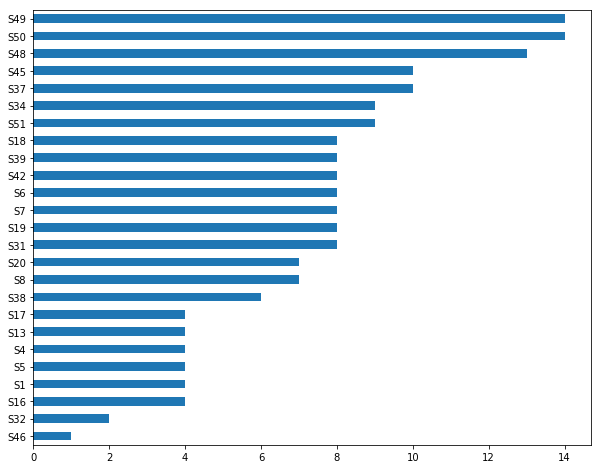

time: 336 ms


In [73]:

fea_imp['StationNo'].value_counts().sort_values().head(25).plot(kind='barh',figsize=(10,8))

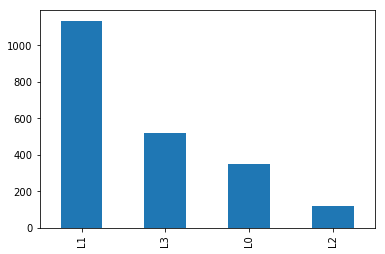

time: 174 ms


In [74]:
fea_imp['LineNo'].value_counts().plot(kind='bar')

# Check Directory and File name

In [41]:
.

SyntaxError: invalid syntax (<ipython-input-41-8cf8463b34ca>, line 1)

In [75]:
fea_imp.to_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Results\\impFeat_sample_bal8.csv',index=False)

time: 8 ms


In [3]:
fea_imp=pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Results\\impFeat_sample_bal8.csv')

time: 64 ms


In [5]:
fea_imp.head()

,fea,coef,LineNo,StationNo,FeatureNo
0,L0_S0_D1,0.050862,L0,S0,D1
1,L3_S29_D3316,0.034879,L3,S29,D3316
2,L0_S5_D115,0.022400,L0,S5,D115
3,L0_S2_D34,0.019880,L0,S2,D34
4,L2_S26_D3037,0.018266,L2,S26,D3037


time: 154 ms
